### Загрузка модулей

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

### Загрузка датасета

In [3]:
train_path=r'C:\Users\AKonshini\YandexDisk\PyData\проект\train.csv'
test_path=r'C:\Users\AKonshini\YandexDisk\PyData\проект\test.csv'

In [4]:
train=pd.read_csv(train_path,sep=',',engine='python')

test=pd.read_csv(test_path,sep=',',engine='python')



In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [7]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [8]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


### Предобработка


<function matplotlib.pyplot.show(*args, **kw)>

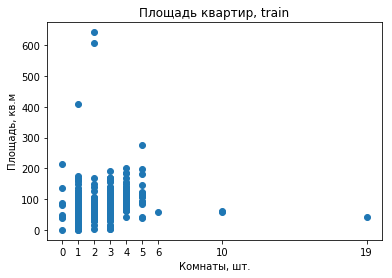

In [9]:
plt.scatter(train['Rooms'],train['Square'])
plt.xticks(train['Rooms'].unique())
plt.title('Площадь квартир, train')
plt.ylabel('Площадь, кв.м')
plt.xlabel('Комнаты, шт.')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

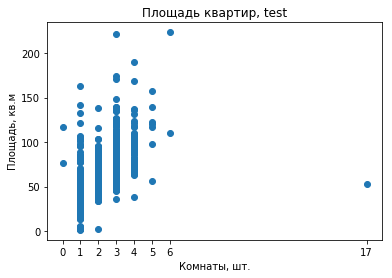

In [10]:
plt.scatter(test['Rooms'],test['Square'])
plt.xticks(test['Rooms'].unique())
plt.title('Площадь квартир, test')
plt.ylabel('Площадь, кв.м')
plt.xlabel('Комнаты, шт.')
plt.show

In [11]:
# Убираем квартиры, чья площадь меньше 10 
train=train[train['Square']>10]
prices=train['Price']

# Исправляем выбросы комнат в зависимости от площади
def fix_rooms(train):
    train.loc[(train['Rooms']>5)&(train['Square']<41), 'Rooms']=1
    train.loc[(train['Rooms']>5)&(train['Square']>=41)&(train['Square']<56), 'Rooms']=2
    train.loc[(train['Rooms']>5)&(train['Square']>=56)&(train['Square']<77), 'Rooms']=3
    train.loc[(train['Rooms']>5)&(train['Square']>=77)&(train['Square']<98), 'Rooms']=4
    train.loc[(train['Rooms']>5)&(train['Square']>=98)&(train['Square']<110), 'Rooms']=5
    train.loc[(train['Rooms']>5)&(train['Square']>=110), 'Rooms']=5                              
    train.loc[(train['Rooms']==0)&(train['Square']<41), 'Rooms']=1
    train.loc[(train['Rooms']==0)&(train['Square']>=41)&(train['Square']<56), 'Rooms']=2
    train.loc[(train['Rooms']==0)&(train['Square']>=56)&(train['Square']<77), 'Rooms']=3
    train.loc[(train['Rooms']==0)&(train['Square']>=77)&(train['Square']<98), 'Rooms']=4
    train.loc[(train['Rooms']==0)&(train['Square']>=98), 'Rooms']=5
    
    


In [12]:
# Убираем экстремальные значения площадей
def high_square(train): 
    mean_squares=train.groupby('Rooms').Square.mean()
    lsquare=train['LifeSquare']/train['Square']
    for i,value in enumerate(mean_squares):
        train.loc[(train['Square']>300) & (train['Rooms']==i),'LifeSquare']=value*lsquare.mean()
        train.loc[(train['Square']>300) & (train['Rooms']==i),'Square']=value
        



In [13]:
#Исправляем жилую площадь
def life_square(train):
    lsquare=train['LifeSquare']/train['Square']
    train.loc[train['LifeSquare'].isnull(),'LifeSquare']=lsquare.mean()*train['Square']
    train.loc[train['LifeSquare']>train['Square'],'LifeSquare']=lsquare.mean()*train['Square']
    train.loc[train['LifeSquare']<6,'LifeSquare']=lsquare.mean()*train['Square']
    


<function matplotlib.pyplot.show(*args, **kw)>

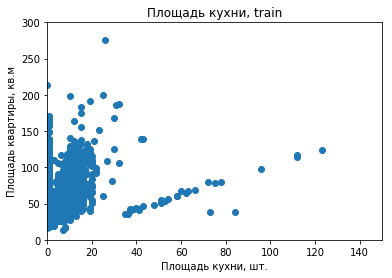

In [14]:
plt.scatter(train['KitchenSquare'],train['Square'])
plt.axis([0,150,0,300])
plt.title('Площадь кухни, train')
plt.ylabel('Площадь квартиры, кв.м')
plt.xlabel('Площадь кухни, шт.')
plt.show

In [15]:
# Исправляем площадь кухни, сначала исправляя те значеия, где кухня больше площади квартиры, а затем просто большие значения.
def kitchen_square(train):
    
    mean=(train['KitchenSquare']/train['Square']).mean()
    train.loc[train['KitchenSquare']>=train['Square'],'KitchenSquare']=mean*train['Square']
    train.loc[train['KitchenSquare']>(train['Square']*0.4),'KitchenSquare']=mean*train['Square'] 



In [16]:
#!!!
def house_floor(train):
    train.loc[train['HouseFloor']<train['Floor'],'HouseFloor']=train['HouseFloor'].median()
    train.loc[train['HouseFloor']<train['Floor'],'HouseFloor']=train['Floor']

    

In [17]:
# Исправляем год постройки дома 
def house_year(train):
    train.loc[train['HouseYear']>2025,'HouseYear']=train['HouseYear'].median()


In [18]:
# Преобразуем object в int
def ecology(train):
    train.loc[train['Ecology_2']=='A','Ecology_2']=0
    train.loc[train['Ecology_2']=='B','Ecology_2']=1
    train.loc[train['Ecology_3']=='A','Ecology_3']=0
    train.loc[train['Ecology_3']=='B','Ecology_3']=1



In [19]:
# Заполняем пропуски 
def healthcare(train): 
    train.loc[train['Healthcare_1'].isnull(),'Healthcare_1']=train['Healthcare_1'].mean()


In [20]:
# Преобразуем object в int
def shop(train):
    train.loc[train['Shops_2']=='A','Shops_2']=0
    train.loc[train['Shops_2']=='B','Shops_2']=1

In [21]:
# Функция обработки 
def preprocessing(train):
    fix_rooms(train)
    high_square(train) 
    life_square(train)
    kitchen_square(train)
    house_floor(train)   
    house_year(train)
    ecology(train)
    healthcare(train)
    shop(train)
    

In [22]:
preprocessing(train)
train=train.drop('Id',axis=1)

In [23]:
preprocessing(test)
test=test.drop('Id',axis=1)

In [24]:
train.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000
mean,50.428714,1.890068,56.234364,36.523377,5.717741,8.524329,14.126552,1984.862034,0.118869,0.990288,0.972467,24.698538,5354.503704,8.046956,1142.851702,1.319984,4.232579,0.917401,214074.592805
std,43.598871,0.813012,19.076642,15.024628,3.988850,5.233997,5.568331,18.412428,0.119058,0.098073,0.163639,17.530997,4006.425612,23.845030,736.972827,1.493597,4.807381,0.275289,92772.458841
min,0.000000,1.000000,13.784865,8.822988,0.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.787090,25.485125,1.000000,4.000000,10.000000,1974.000000,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,1.000000,153891.653482
50%,36.000000,2.000000,52.539909,33.360968,6.000000,7.000000,14.000000,1977.000000,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,1142.851702,1.000000,3.000000,1.000000,192269.644879
75%,75.000000,2.000000,65.912854,44.508399,9.000000,12.000000,17.000000,2001.000000,0.195781,1.000000,1.000000,36.000000,7227.000000,5.000000,1142.851702,2.000000,6.000000,1.000000,249100.769116
max,209.000000,5.000000,275.645284,233.949309,43.000000,42.000000,117.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9988 entries, 0 to 9999
Data columns (total 19 columns):
DistrictId       9988 non-null int64
Rooms            9988 non-null float64
Square           9988 non-null float64
LifeSquare       9988 non-null float64
KitchenSquare    9988 non-null float64
Floor            9988 non-null int64
HouseFloor       9988 non-null float64
HouseYear        9988 non-null float64
Ecology_1        9988 non-null float64
Ecology_2        9988 non-null int64
Ecology_3        9988 non-null int64
Social_1         9988 non-null int64
Social_2         9988 non-null int64
Social_3         9988 non-null int64
Healthcare_1     9988 non-null float64
Helthcare_2      9988 non-null int64
Shops_1          9988 non-null int64
Shops_2          9988 non-null int64
Price            9988 non-null float64
dtypes: float64(9), int64(10)
memory usage: 1.8 MB


In [26]:
test.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,51.279200,1.908200,56.449500,36.548472,5.723787,8.632000,13.946800,1984.392600,0.119874,0.990400,0.970200,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800,0.917600
std,44.179466,0.809632,19.092787,14.537189,3.936023,5.483228,5.780368,18.573149,0.120070,0.097518,0.170052,17.532202,4026.614773,23.863762,756.632091,1.47994,4.777365,0.275001
min,0.000000,1.000000,1.378543,0.902572,0.000000,1.000000,1.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,21.000000,1.000000,41.906231,25.428268,1.000000,4.000000,9.000000,1973.000000,0.019509,1.000000,1.000000,6.000000,1564.000000,0.000000,810.000000,0.00000,1.000000,1.000000
50%,37.000000,2.000000,52.921340,33.694046,6.000000,7.000000,14.000000,1977.000000,0.072158,1.000000,1.000000,25.000000,5285.000000,2.000000,1146.657263,1.00000,3.000000,1.000000
75%,77.000000,2.000000,66.285129,44.663101,9.000000,12.000000,17.000000,2000.000000,0.195781,1.000000,1.000000,36.000000,7287.000000,5.000000,1146.657263,2.00000,6.000000,1.000000
max,212.000000,5.000000,223.453689,136.921090,42.000000,78.000000,99.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,1.000000


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null float64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null int64
Ecology_3        5000 non-null int64
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     5000 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null int64
dtypes: float64(8), int64(10)
memory usage: 703.2 KB


### Построение нового признака

In [28]:
# Средняя стоимость квадратного  метра в зависимости от района. 
train['Meter_price']=train['Price']/train['Square']
dum=train.groupby('DistrictId',as_index =False).Meter_price.mean()
train=train.drop('Meter_price',axis=1)
train = train.merge(dum, on='DistrictId', how='left')
test = test.merge(dum, on='DistrictId', how='left')
# Заполняем полученные пропуски в тестовом датасете
test.loc[test['Meter_price'].isnull(),'Meter_price']=test['Meter_price'].mean()
# Удаляем цену из датасета
train=train.drop('Price',axis=1)



### Нормализация и разбиение на валидационный датасет

In [29]:
scaler = MinMaxScaler()

train_scaled = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)

test_scaled = pd.DataFrame(scaler.transform(test), columns=test.columns) 

In [30]:
x_train, x_valid, y_train, y_valid = train_test_split(train_scaled, prices, test_size=0.3, random_state=42)

### Построение модели

In [31]:
model =  RandomForestRegressor(n_estimators=351 ,random_state=1, max_depth=14, max_features=9 )
model.fit(x_train, y_train) # обучение на тренировочных данных
y_pred = model.predict(x_valid) # предсказание на валидационных данных


In [32]:
# Оценка точности
r2_score(y_valid, y_pred)


0.7663046663208422

In [33]:
# Обучаем модель на всех тренировочных данных

model.fit(train_scaled, prices) # обучение
y_pred = model.predict(test_scaled) # предсказание для загрузки в Kaggle


In [34]:
# to_id=pd.read_csv(test_path,sep=',', engine='python')
# answer = pd.DataFrame({'Id': np.array(to_id['Id']), 'Price': y_pred})
# answer.to_csv('answer.csv', sep=',',index=False)